<a href="https://colab.research.google.com/github/pyrozhenko/Mashine-Navchanya/blob/main/%D0%9F%D0%B8%D1%80%D0%BE%D0%B6%D0%B5%D0%BD%D0%BA%D0%BE%20%D0%9B%D0%90%D0%91%204%20%D0%A4%D0%86%D0%A2%204-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# Імпорт необхідних бібліотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Крок 1: Завантаження файлу та виведення перших 5 рядків
data = pd.read_csv('Housing.csv')
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [57]:
# Крок 2: Створення нового датасету з обраними стовпчиками
columns = ['price', 'area', 'bedrooms', 'bathrooms']
new_data = data[columns]

In [58]:
# Крок 3: Попередній аналіз даних
# Заміна "-" на NaN
new_data.replace('-', pd.NA, inplace=True)

<ipython-input-58-89bbedd319d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace('-', pd.NA, inplace=True)


In [59]:
# Зміна типу даних на float
new_data = new_data.astype(float)

In [60]:
# Заміна відсутніх значень середнім
new_data.fillna(new_data.mean(), inplace=True)


In [61]:
# Крок 5: Розділення даних на навчальний та тестовий набори
from sklearn.model_selection import train_test_split

# Визначте X та y
X = normalized_data[:, 1:]  # всі стовпці, крім першого
y = normalized_data[:, 0]   # перший стовпець

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Крок 6: Вибір атрибутів та цільової змінної
# Вибір атрибутів
X_train_attributes = X_train  # Використовуйте всі атрибути або виберіть конкретні стовпці

# Вибір цільової змінної
y_train_target = y_train  # Використовуйте ціни на будинки як цільову змінну


In [64]:
# Крок 7: Побудова та навчання моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Крок 8: Оцінка якості моделі на тестових даних
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


RMSE: 0.9189337083043986
R^2: 0.03478945346736284


In [66]:
# Крок 9: Крос-валідація
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-validated R^2 scores: {cv_scores}')

Cross-validated R^2 scores: [-0.98684162 -0.4337402  -0.22139982 -0.40105317 -1.21135893]


In [67]:
# Частина 2: Знайдення параметрів аналітичним рішенням


# Додаємо стовпець одиниць для intercept'а
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
analytical_solution = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ (X_train_with_intercept.T @ y_train)

# Виведення коефіцієнтів лінійної регресії
print('Коефіцієнти лінійної регресії (аналітичний метод):')
print(analytical_solution)



Коефіцієнти лінійної регресії (аналітичний метод):
[0.00949143 0.09080173 0.17506919]


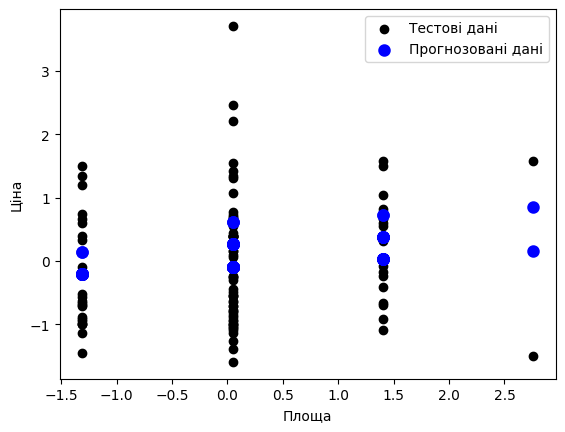

In [68]:
# Частина 3: Візуалізація результатів
import matplotlib.pyplot as plt

# Візуалізація розподілу даних
plt.scatter(X_test[:, 0], y_test, color='black', label='Тестові дані')  # Припустимо, що 'area' - перший стовпець
plt.scatter(X_test[:, 0], y_pred, color='blue', linewidth=3, label='Прогнозовані дані')
plt.xlabel('Площа')
plt.ylabel('Ціна')
plt.legend()
plt.show()


ВИСНОВКИ

Якщо лінійна регресія дає добрі результати на тестовому наборі та коефіцієнти виглядають логічними, то модель може бути вважена ефективною для даного завдання.
Аналітичне рішення слугує важливим інструментом для порівняння та перевірки результатів, але його застосування може бути обмеженим для складних моделей та великих обсягів даних.
Загалом, ефективність лінійної регресії визначається співвідношенням між моделлю та характером даних. Порівняння з аналітичним рішенням може допомогти в оцінці стабільності та точності моделі.